In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Read Dataset from UCI machine learning repository

In [4]:
df = pd.read_csv("/content/tic_2000_eval_data.csv")
df.head()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 85 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   4000 non-null   int64
 1   MAANTHUI  4000 non-null   int64
 2   MGEMOMV   4000 non-null   int64
 3   MGEMLEEF  4000 non-null   int64
 4   MOSHOOFD  4000 non-null   int64
 5   MGODRK    4000 non-null   int64
 6   MGODPR    4000 non-null   int64
 7   MGODOV    4000 non-null   int64
 8   MGODGE    4000 non-null   int64
 9   MRELGE    4000 non-null   int64
 10  MRELSA    4000 non-null   int64
 11  MRELOV    4000 non-null   int64
 12  MFALLEEN  4000 non-null   int64
 13  MFGEKIND  4000 non-null   int64
 14  MFWEKIND  4000 non-null   int64
 15  MOPLHOOG  4000 non-null   int64
 16  MOPLMIDD  4000 non-null   int64
 17  MOPLLAAG  4000 non-null   int64
 18  MBERHOOG  4000 non-null   int64
 19  MBERZELF  4000 non-null   int64
 20  MBERBOER  4000 non-null   int64
 21  MBERMIDD  4000 non-null   int64
 22  

In [7]:
df.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
AZEILPL     0
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
Length: 85, dtype: int64

In [8]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.253000,1.10600,2.675750,3.004000,5.787000,0.706750,4.653250,1.021250,3.269500,6.197000,...,0.084500,0.003500,0.010000,0.00375,0.579750,0.001500,0.003750,0.031000,0.009250,0.013250
std,13.022822,0.42108,0.767306,0.790025,2.899609,1.032241,1.729093,1.001274,1.618958,1.876585,...,0.394206,0.059065,0.099511,0.06113,0.560106,0.038706,0.072369,0.206276,0.095743,0.114358
min,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.00000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.00000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.00000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.00000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,5.000000,1.000000,1.000000,1.00000,6.000000,1.000000,2.000000,4.000000,1.000000,1.000000


# 2. Apply Data Pre processing
# Drop unnecessary columns

In [ ]:
# Renaming columns
df.columns = ["Attribute " + str(i) for i in range(1, len(df.columns)+1)]

# Dropping redundant columns
df = df.drop(["Attribute 37", "Attribute 38"], axis=1)

# Checking for missing values
print(df.isnull().sum())

# Converting categorical variables to numerical variables
cat_vars = ["Attribute 2", "Attribute 7", "Attribute 8", "Attribute 9", "Attribute 10", 
            "Attribute 11", "Attribute 17", "Attribute 18", "Attribute 19", "Attribute 20", 
            "Attribute 21", "Attribute 22", "Attribute 23", "Attribute 24", "Attribute 25", 
            "Attribute 26", "Attribute 27", "Attribute 28", "Attribute 29", "Attribute 30", 
            "Attribute 31", "Attribute 32", "Attribute 33", "Attribute 34", "Attribute 35"]
df[cat_vars] = df[cat_vars].apply(lambda x: pd.factorize(x)[0])


Attribute 1     0
Attribute 2     0
Attribute 3     0
Attribute 4     0
Attribute 5     0
               ..
Attribute 81    0
Attribute 82    0
Attribute 83    0
Attribute 84    0
Attribute 85    0
Length: 83, dtype: int64


#Applying classification and regression models


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
X = df.drop(["Attribute 1"], axis=1)
y = df["Attribute 1"]

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#REGRESSION MODELS

#1.Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
print("Linear Regression MSE:", mse_lin_reg)

Linear Regression MSE: 1.7803527638795618



#2.Decision Tree Regressor

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
print("Decision Tree Regressor MSE:", mse_dt_reg)

Decision Tree Regressor MSE: 0.3103125


#3.Random forest regressor

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
print("Random Forest Regressor MSE:", mse_rf_reg)

Random Forest Regressor MSE: 0.17664657781887755


#4.Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train SVR model
svr_model.fit(X_train, y_train)

# Predict using SVR model
y_pred_svr = svr_model.predict(X_test)

# Evaluate SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error of SVR model:", mse_svr)


Mean Squared Error of SVR model: 93.11979032832795


#5.Gradient Boosting Regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train Gradient Boosting model
gb_model.fit(X_train, y_train)

# Predict using Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error of Gradient Boosting model:", mse_gb)


Mean Squared Error of Gradient Boosting model: 0.5489152591425015


#CLASSIFICATION MODELS

#1.Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.775


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



#2.Decision Tree Classifier

In [ ]:
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train, y_train)
y_pred_dt_class = dt_class.predict(X_test)
accuracy_dt_class = accuracy_score(y_test, y_pred_dt_class)
print("Decision Tree Classifier Accuracy:", accuracy_dt_class)

Decision Tree Classifier Accuracy: 0.9375


#3.Random Forest Classifier

In [ ]:
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)
y_pred_rf_class = rf_class.predict(X_test)
accuracy_rf_class = accuracy_score(y_test, y_pred_rf_class)
print("Random Forest Classifier Accuracy:", accuracy_rf_class)

Random Forest Classifier Accuracy: 0.90375


#4.SUPPORT VECTOR MACHINES(SVM)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1, random_state=42)

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict using SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM classifier:", accuracy_svm)


Accuracy of SVM classifier: 0.885


#5.NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Train Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Predict using Naive Bayes classifier
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes classifier:", accuracy_nb)


Accuracy of Naive Bayes classifier: 0.4275


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV


 Tuning hyperparameters for Decision Tree Regressor

In [ ]:
param_grid_dt_reg = {
    "max_depth": [3, 5, 10],
    "min_samples_leaf": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}
grid_search_dt_reg = GridSearchCV(estimator=dt_reg, param_grid=param_grid_dt_reg, 
                                  cv=5, n_jobs=-1, verbose=2)
grid_search_dt_reg.fit(X_train, y_train)
print("Best Parameters for Decision Tree Regressor:", grid_search_dt_reg.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for Decision Tree Regressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2}


 hyperparameterTuning for Logistic Regression

---



In [ ]:
param_grid_log_reg = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10]
}
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, 
                                   cv=5, n_jobs=-1, verbose=2)
grid_search_log_reg.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Huperparametertuning for Random Forest Regressor

In [ ]:
param_grid_rf_reg = {
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 5, 10],
    "min_samples_leaf": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}
grid_search_rf_reg = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf_reg, 
                                  cv=5, n_jobs=-1, verbose=2)
grid_search_rf_reg.fit(X_train, y_train)
print("Best Parameters for Random Forest")

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: ignored

#R-SQUARED SCORE

In [ ]:
from sklearn.metrics import r2_score

#1.FOR SVR

In [ ]:
r2_svr = r2_score(y_test, y_pred_svr)
print("R-squared score of SVR model:", r2_svr)

R-squared score of SVR model: 0.4529422269795158


#2.for Gradient Boosting model

In [ ]:
r2_gb = r2_score(y_test, y_pred_gb)
print("R-squared score of Gradient Boosting model:", r2_gb)

R-squared score of Gradient Boosting model: 0.9967752466131562


#3.for Linear Regression model

In [ ]:
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print("R-squared score of Linear Regression model:", r2_lin_reg)

R-squared score of Linear Regression model: 0.9895408289176256


#4.Decision Tree Regressor model

In [ ]:
r2_reg = r2_score(y_test, y_pred_reg)
print("R-squared score of Decision Tree Regressor model:", r2_reg)

NameError: ignored

#5.Random Forest Regressor model

In [ ]:
r2_rfr = r2_score(y_test, y_pred_rfr)
print("R-squared score of Random Forest Regressor model:", r2_rfr)

NameError: ignored

#EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files = files.upload()

Saving tic_2000_eval_data.csv to tic_2000_eval_data (3).csv
Saving tic_2000_target_data.csv to tic_2000_target_data.csv


In [ ]:
df = pd.read_csv("tic_2000_eval_data.csv")

In [ ]:
print(df.head())

   MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        4         2         8       0       6       0   
1        6         1        3         2         2       0       5       0   
2       39         1        3         3         9       1       4       2   
3        9         1        2         3         3       2       3       2   
4       31         1        2         4         7       0       2       0   

   MGODGE  MRELGE  ...  ALEVEN  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  \
0       3       5  ...       0         0        0        0       1        0   
1       4       5  ...       2         0        0        0       1        0   
2       3       5  ...       1         0        0        0       1        0   
3       4       5  ...       0         0        0        0       1        0   
4       7       9  ...       0         0        0        0       1        0   

   APLEZIER  AFIETS  AINBOED  ABYSTAND  
0         0       0  

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 85 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   4000 non-null   int64
 1   MAANTHUI  4000 non-null   int64
 2   MGEMOMV   4000 non-null   int64
 3   MGEMLEEF  4000 non-null   int64
 4   MOSHOOFD  4000 non-null   int64
 5   MGODRK    4000 non-null   int64
 6   MGODPR    4000 non-null   int64
 7   MGODOV    4000 non-null   int64
 8   MGODGE    4000 non-null   int64
 9   MRELGE    4000 non-null   int64
 10  MRELSA    4000 non-null   int64
 11  MRELOV    4000 non-null   int64
 12  MFALLEEN  4000 non-null   int64
 13  MFGEKIND  4000 non-null   int64
 14  MFWEKIND  4000 non-null   int64
 15  MOPLHOOG  4000 non-null   int64
 16  MOPLMIDD  4000 non-null   int64
 17  MOPLLAAG  4000 non-null   int64
 18  MBERHOOG  4000 non-null   int64
 19  MBERZELF  4000 non-null   int64
 20  MBERBOER  4000 non-null   int64
 21  MBERMIDD  4000 non-null   int64
 22  

# Check summary statistics

In [ ]:
print(df.describe())

           MOSTYPE    MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  4000.000000  4000.00000  4000.000000  4000.000000  4000.000000   
mean     24.253000     1.10600     2.675750     3.004000     5.787000   
std      13.022822     0.42108     0.767306     0.790025     2.899609   
min       1.000000     1.00000     1.000000     1.000000     1.000000   
25%      10.000000     1.00000     2.000000     3.000000     3.000000   
50%      30.000000     1.00000     3.000000     3.000000     7.000000   
75%      35.000000     1.00000     3.000000     3.000000     8.000000   
max      41.000000    10.00000     6.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  ...  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  ...   
mean      0.706750     4.653250     1.021250     3.269500     6.197000  ...   
std       1.032241     1.729093     1.001274     1.618958     1.876585  ...   
min       0.000000     0.0

In [ ]:
df = pd.read_csv("tic_2000_target_data.csv")

In [ ]:
print(df.head())

   Target
0       0
1       1
2       0
3       0
4       0


In [ ]:
print(df.describe())

            Target
count  4000.000000
mean      0.059500
std       0.236588
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


# Check correlation between features

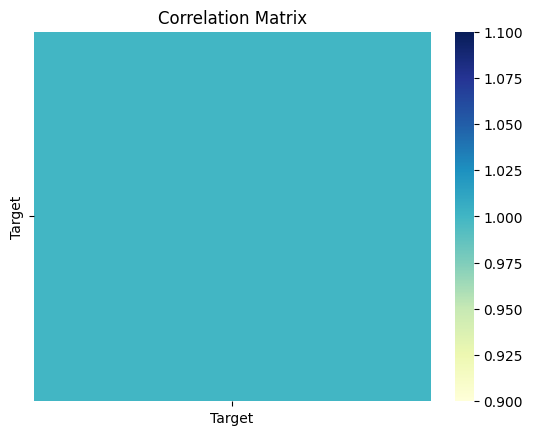

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# Check distribution of target variable

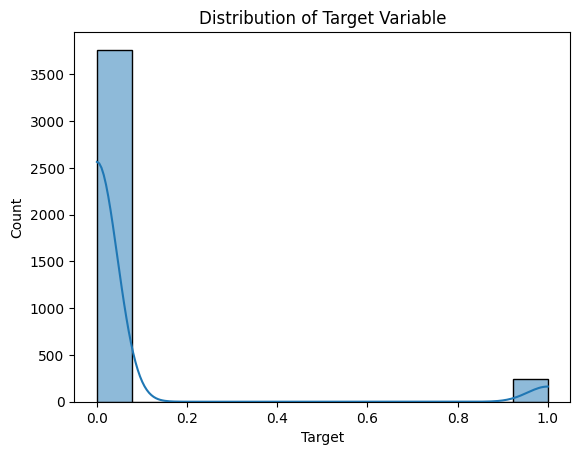

In [ ]:
sns.histplot(df["Target"], kde=True)
plt.title("Distribution of Target Variable")
plt.show()

# Check distribution of numerical features

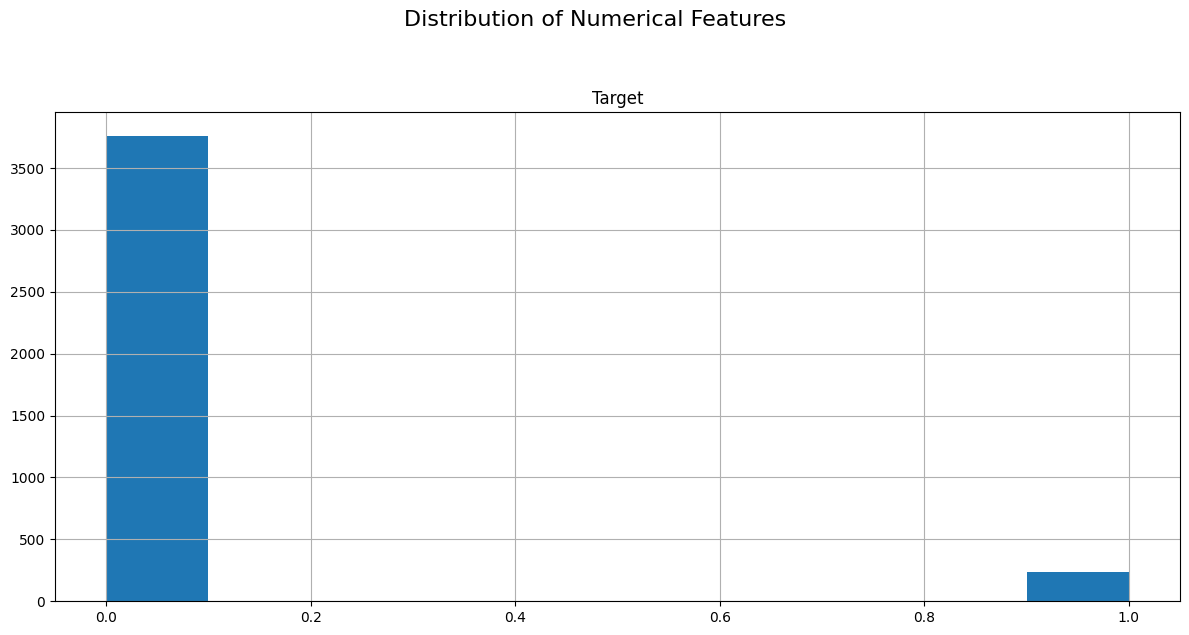

In [ ]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols].hist(figsize=(12, 6))
plt.suptitle("Distribution of Numerical Features", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


# Check relationship between features and target variable

In [ ]:
sns.pairplot(df, x_vars=num_cols[:-1], y_vars=["MOSTYPE"], kind="reg", height=3)
plt.suptitle("Relationship between Features and Target Variable", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

ValueError: ignored

#HEAT MAP

<Axes: >

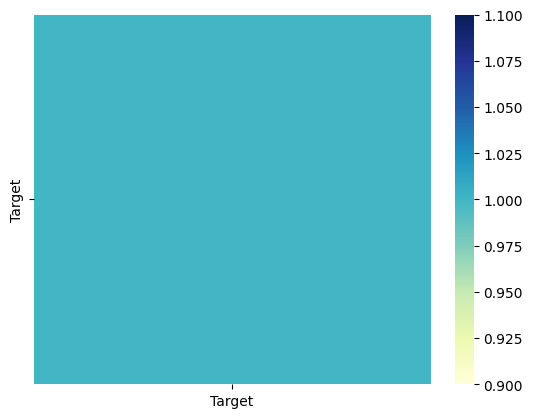

In [ ]:
import seaborn as sns

# Create correlation matrix
corr = df.corr()

# Create heatmap
sns.heatmap(corr, cmap="YlGnBu")


#cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Load data
data = pd.read_csv("tic_2000_eval_data.csv")

X = data.drop(["MOSTYPE"], axis=1)
y = data["MOSTYPE"]

# Create linear regression model
lin_reg = LinearRegression()

# Perform cross validation
scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Print mean and standard deviation of cross validation scores
print("Cross validation scores:", np.sqrt(-scores))
print("Mean RMSE:", np.mean(np.sqrt(-scores)))
print("Standard deviation of RMSE:", np.std(np.sqrt(-scores)))


Cross validation scores: [1.39265281 1.37931118 1.39331586 1.39325532 1.39956559]
Mean RMSE: 1.391620149784165
Standard deviation of RMSE: 0.006652163578293517


#RANSAC 

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
files=files.upload()

Saving tic_2000_eval_data.csv to tic_2000_eval_data (1).csv


In [ ]:

df = pd.read_csv("tic_2000_eval_data.csv")

In [ ]:
 df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print(df)

      MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        4         2         8       0       6       0   
1           6         1        3         2         2       0       5       0   
2          39         1        3         3         9       1       4       2   
3           9         1        2         3         3       2       3       2   
4          31         1        2         4         7       0       2       0   
...       ...       ...      ...       ...       ...     ...     ...     ...   
3995       33         1        2         4         8       0       7       2   
3996       24         1        2         3         5       1       5       1   
3997       36         1        2         3         8       1       5       1   
3998       33         1        3         3         8       1       4       2   
3999        8         1        2         3         2       4       3       0   

      MGODGE  MRELGE  ...  ALEVEN  APER

In [ ]:
X=df['MOSTYPE']
Y=df['MGEMOMV']
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)


In [ ]:
ran_reg=RANSACRegressor(LinearRegression())
ran_reg.fit(xtrain.values.reshape(-1,1),ytrain)

RANSACRegressor(estimator=LinearRegression())

In [ ]:
inliers=ran_reg.inlier_mask_
outliers=np.logical_not(inliers)

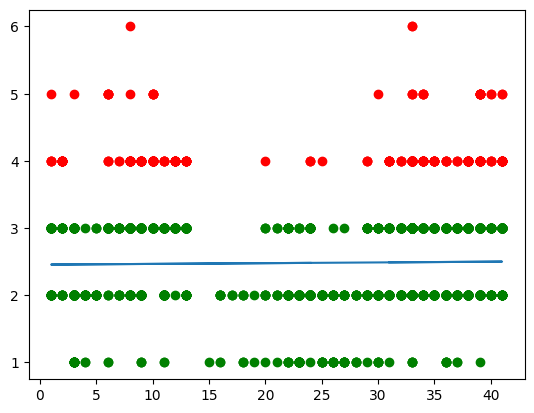

In [ ]:
plt.scatter(xtrain.values.reshape(-1,1)[inliers],ytrain[inliers],color="green")
plt.scatter(xtrain.values.reshape(-1,1)[outliers],ytrain[outliers],color="red")
plt.plot(xtrain,ran_reg.predict(xtrain.values.reshape(-1,1)))
plt.show()

#POLYNOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

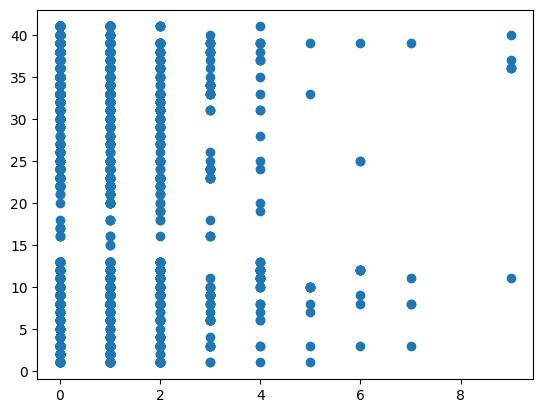

In [ ]:
data=pd.read_csv("tic_2000_eval_data.csv")
plt.scatter(data['MGODRK'],data['MOSTYPE'])
plt.show()